In [1]:
import pygrib
import numpy as np

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [2]:
# Grib File for this code is provided from WRF input data
grbs = pygrib.open("gdas1.fnl0p25.2024022100.f00.grib2")
grbs

In [3]:
grbs.seek(0)
for grb in grbs:
    print(grb)

1:Pressure reduced to MSL:Pa (instant):regular_ll:meanSea:level 0:fcst time 0 hrs:from 202402210000
2:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202402210000
3:Ice water mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202402210000
4:Rain mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202402210000
5:Snow mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202402210000
6:Graupel (snow pellets):kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202402210000
7:Derived radar reflectivity:dB (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202402210000
8:Derived radar reflectivity:dB (instant):regular_ll:hybrid:level 2:fcst time 0 hrs:from 202402210000
9:Maximum/Composite radar reflectivity:dB (instant):regular_ll:atmosphere:level 0 -:fcst time 0 hrs:from 202402210000
10:Visibility:m (instant):regular_ll:surface:level 0:fcst time 0 hr

In [4]:
# We can select parameter based on above cell
grbs.select(name='Temperature')

[16:Temperature:K (instant):regular_ll:isobaricInPa:level 1 Pa:fcst time 0 hrs:from 202402210000,
 26:Temperature:K (instant):regular_ll:isobaricInPa:level 2 Pa:fcst time 0 hrs:from 202402210000,
 36:Temperature:K (instant):regular_ll:isobaricInPa:level 4 Pa:fcst time 0 hrs:from 202402210000,
 46:Temperature:K (instant):regular_ll:isobaricInPa:level 7 Pa:fcst time 0 hrs:from 202402210000,
 56:Temperature:K (instant):regular_ll:isobaricInPa:level 10 Pa:fcst time 0 hrs:from 202402210000,
 66:Temperature:K (instant):regular_ll:isobaricInPa:level 20 Pa:fcst time 0 hrs:from 202402210000,
 76:Temperature:K (instant):regular_ll:isobaricInPa:level 40 Pa:fcst time 0 hrs:from 202402210000,
 86:Temperature:K (instant):regular_ll:isobaricInPa:level 70 Pa:fcst time 0 hrs:from 202402210000,
 96:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 202402210000,
 106:Temperature:K (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 0 hrs:from 202402210000,
 116:Temp

In [5]:
# We can select pressure level
selected_grb = grbs.select(name='Temperature')[41]
selected_grb

563:Temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202402210000

In [6]:
# Extract data
data_actual, lats, lons = selected_grb.data()
lon = lons[0]
lat = lats[:,0]

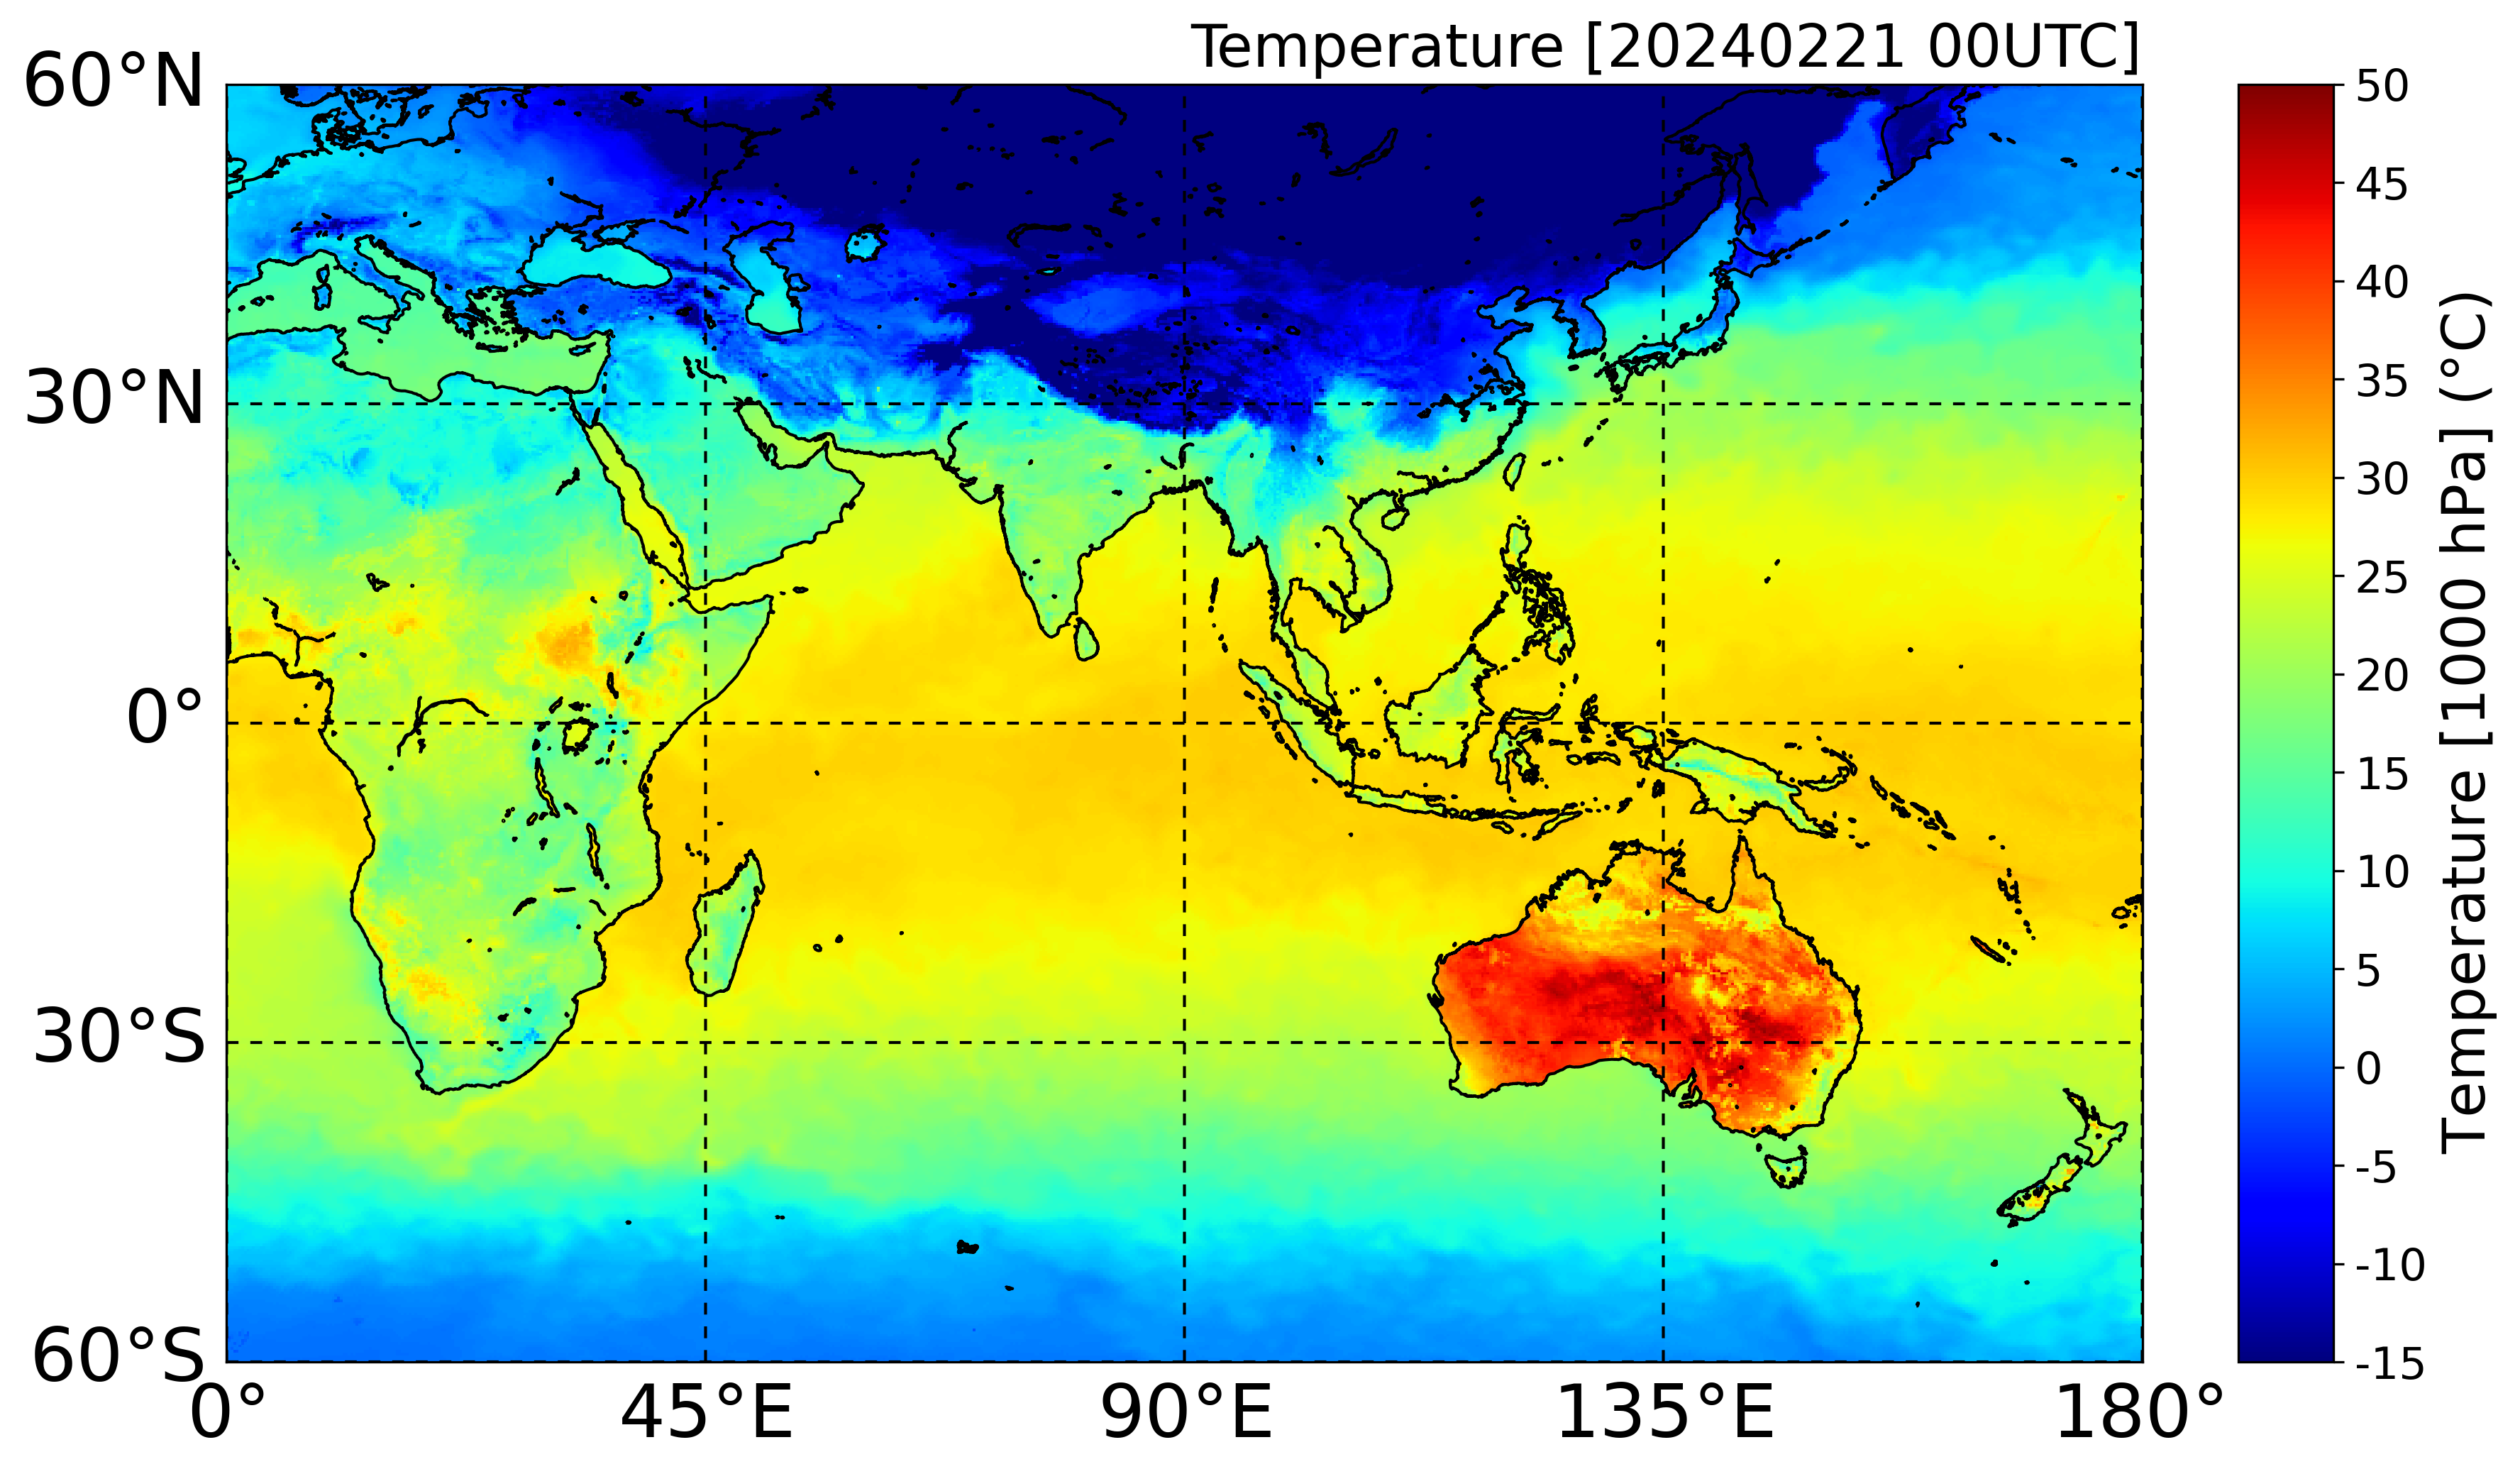

In [7]:
bm = Basemap(projection='cyl',llcrnrlon=0,llcrnrlat=-60,urcrnrlon=180,urcrnrlat=60,resolution='i')
x,y = np.meshgrid(lon,lat)
x,y = bm(x,y)

fig= plt.figure(figsize=(20,20), dpi=300)
axA1 = fig.add_axes([0, 0, 1.5, 0.3]) 

bm.drawcoastlines(linewidth=1)

parallels = np.arange(-60,61,30)
bm.drawparallels(parallels,labels=[True,False,False,True],fontsize=25, dashes=[4, 4])
meridians = np.arange(0,181,45)
bm.drawmeridians(meridians,labels=[True,False,False,True],fontsize=25, dashes=[4, 4])
    
bm.fillcontinents(color='white',lake_color='azure')
    
contourf = bm.colorbar(bm.pcolormesh(x,y, data_actual-273.15, vmin=-15,vmax=50, cmap='jet', zorder=1), 
                    location='right', size='5%', pad='5%', ticks=[-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50])
contourf.set_label('Temperature [1000 hPa] ($\degree$C)',fontsize=20)
contourf.ax.set_yticklabels(['-15','-10','-5','0','5','10','15','20','25','30','35','40','45','50'])
contourf.ax.tick_params(labelsize=15)
    
plt.title("Temperature [20240221 00UTC]", loc='right', fontsize=20)

plt.show()
#fig.savefig('temperature.svg',dpi=300,orientation='landscape', bbox_inches='tight')